# Text Summarization


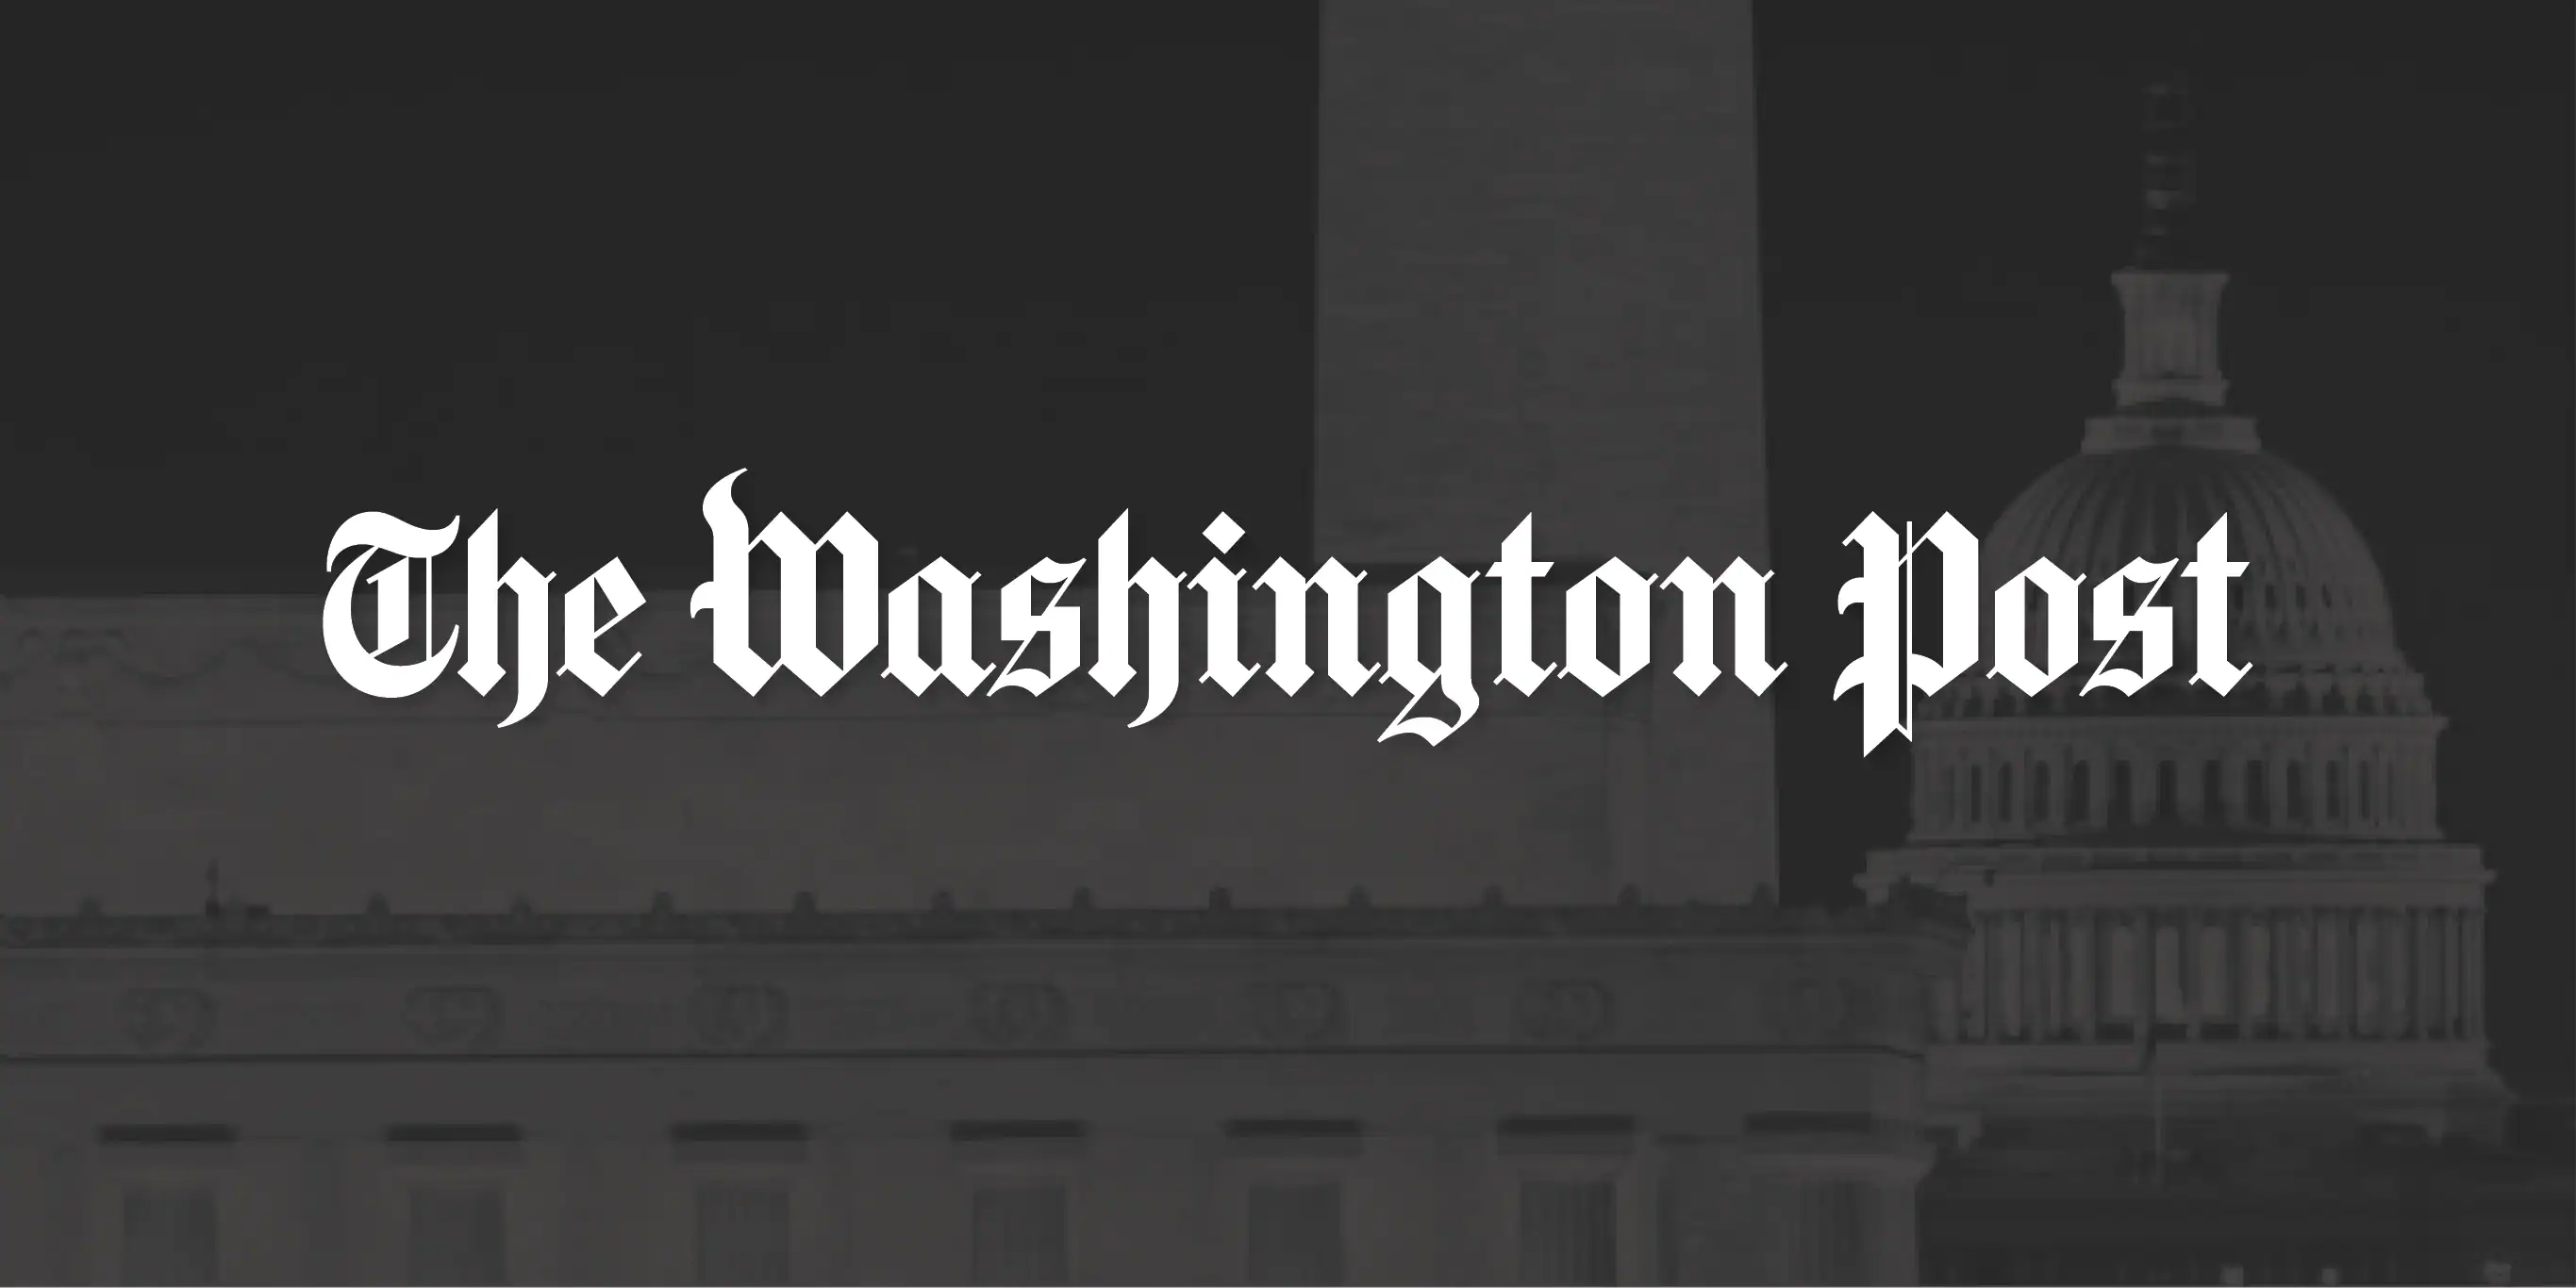

# Web Scraping 
#### Web Scraping is the process through which we extract data from a website, and save it in a form which is easy to read, to understand and to work on.

## How does web scraping work?

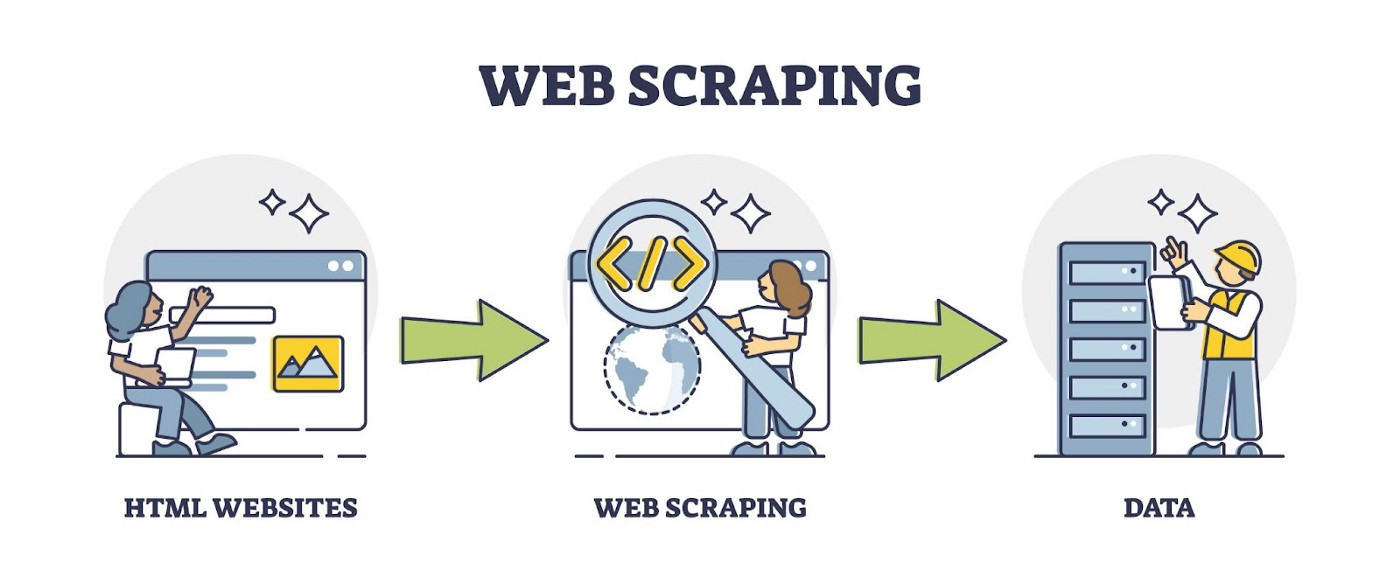

#### To understand web scraping, it’s important to first understand that web pages are built with text-based mark-up languages – the most common being HTML.

#### A mark-up language defines the structure of a website’s content. Since there are universal components and tags of mark-up languages, this makes it much easier for web scrapers to pull all the information that it needs. Once the HTML is parsed, the scraper then extracts the necessary data and stores it.

#### **To extract data using web scraping with python, you need to follow these basic steps:**

1. Find the URL that you want to scrape
2. Inspecting the Page
3. Find the data you want to extract
4. Write the code
5. Run the code and extract the data
6. Store the data in the required format 

### Import Necessary Libraries
#### Libraries used for Web Scraping As we know, Python has various applications and there are different libraries for different purposes. In our further demonstration, we will be using the following libraries:

1. Natural language Toolkit (NLTK): NLTK is a complete toolkit for all NLP techniques.
2. urllib is a Python 3 package that allows you to access, and interact with, websites using their URLs (Uniform Resource Locator). 
3. The requests library is the de facto standard for making HTTP requests in Python. It abstracts the complexities of making requests behind a beautiful, simple API so that you can focus on interacting with services and consuming data in your application.
4. BeautifulSoup: Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that are helpful to extract the data easily.

In [1]:
import nltk 
import urllib
import requests
from nltk.tokenize import word_tokenize , sent_tokenize
from nltk.probability import FreqDist
from collections import defaultdict
from nltk.corpus import stopwords 
from string import punctuation
from bs4 import BeautifulSoup
from heapq import nlargest
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

### Find the URL that you want to scrape

In [2]:
articleURL = 'https://www.washingtonpost.com/news/the-switch/wp/2016/10/18/the-pentagons-massive-new-telescope-is-designed-to-track-space-junk-and-watch-out-for-killer-asteroids/'

### Write the Basic fundamentals code of web scraping
Now that we have written the code to open the URL, it’s time to extract the data from the website. As mentioned earlier, the data we want to extract is nested in <'p'> tags. So, I will find the 'p' tags with those respective class names, extract the data and store the data in a variable. Refer to the code below:

In [3]:
def getTextWapo(url):
  page = urllib.request.urlopen(url).read().decode('utf8','ignore')
  soup = BeautifulSoup(page,'lxml')
  text = '  '.join(map(lambda p: p.text, soup.find_all('article'))) 
  return text

In [4]:
text = getTextWapo(articleURL)
text

"The Space Surveillance Telescope offers improvements in determining the orbits of newly discovered objects and provides rapid observations of space events. (Video: DARPAtv)Gift ArticleShareThere are a lot of rocks flying around through space. Lots of debris, too. Old satellites, spent rocket boosters, even for a short while a spatula that got loose during a space shuttle mission in 2006. All of it swirling around in orbit, creating a bit of a traffic jam.WpGet the full experience.Choose your planArrowRightFor years, the Pentagon has been worried about the collisions that might be caused by an\xa0estimated 500,000 pieces of debris, taking out enormously valuable satellites and, in turn, creating even more debris. On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Projec

## Summarize

#### **Terms Used:** 

**step 1:** *Tokenizers*
This divides a text into a series of tokens. In Tokenizers, there are three main tokens – sentence, word, and regex tokenizer. We will be using only the word and the sentence tokenizer.

**Step 2:** Remove the Stop Words and store them in a separate array of words.

*Stop Words*
Words such as is, an, a, the, for that do not add value to the meaning of a sentence.

**Step 3:** We can then create a frequency table of the words.

A Python Dictionary can keep a record of how many times each word will appear in the text after removing the stop words. We can use this dictionary over each sentence to know which sentences have the most relevant content in the overall text.

**Step 4:** Depending on the words it contains and the frequency table, we will assign a score to each sentence.

Here, we will use the word_tokenize() method that can be used to create the array of sentences. We will also need a dictionary to keep track of the score of each sentence, and we can later go through the dictionary to create a summary.


In [5]:
def summarize(text, n): 
  sents = sent_tokenize(text)
  assert n <= len(sents) # check whether the text has required number of sentences 
  word_sent = word_tokenize(text.lower())
  _stopwords = set(stopwords.words('english') + list(punctuation))

  word_sent = [word for word in word_sent if word not in _stopwords]
  freq = FreqDist(word_sent)

  ranking = defaultdict(int)

  for i,sent in enumerate(sents):
    for w in word_tokenize(sent.lower()):
      if w in freq:
        ranking[i]+= freq[w]

  sents_idx = nlargest(n,ranking , key= ranking.get)
  return[sents[j] for j in sorted(sents_idx)]

#### We can finally apply our summarizer on a set of articles extracted from the () news feed:

In [6]:
summarize(text, 3)

['On Tuesday, the Defense Department\xa0took another significant step toward monitoring all of the cosmic junk swirling around in space, by delivering\xa0a gigantic new telescope capable of seeing small objects from very far away.Developed by the Defense Advanced Research Project Agency, the Space Surveillance Telescope was formally transferred to the Air Force during a ceremony at White Sands Missile Base in New Mexico Tuesday.AdvertisementThe telescope is designed to monitor objects as small as softballs, in Geosynchonous orbit (GEO)—some of the most important real estate in space.',
 "But the telescope's ability to see “something very far away over a very wide area is really what it’s best at.”DARPA says the advanced technology in the massive, 90-ton telescope would\xa0allow officials to go from “seeing only a few large objects at a time through the equivalent of a drinking straw to a windshield view with 10,000 objects at a time.”\xa0It is also being used by NASA to monitor asteroi

## Endnotes
Text summarization of articles can be performed by using the NLTK library and the BeautifulSoup library. This can help in saving time. Higher Deep learning techniques can be further used to get more optimum summarizations. 